In [1]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Importing dataset
df = pd.read_excel('pv3.xlsx', sheet_name="2015")

DATA AUDIT

In [3]:
# First five rows of the dataset
df.head()

,Date,Day,Month,Year,mess,ano_mes,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,lucro,Cost,receita_liq
0,2015-01-28,28,January,2015,1,201501,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,944,1912,2856
1,2015-01-13,13,January,2015,1,201501,46,Adults (35-64),F,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,544,1266,1810
2,2015-01-15,15,January,2015,1,201501,46,Adults (35-64),F,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",3,1266,2320,1631,3798,5429
3,2015-01-03,3,January,2015,1,201501,23,Youth (<25),M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,752,1266,2018
4,2015-01-02,2,January,2015,1,201501,25,Young Adults (25-34),M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1,1252,2295,745,1252,1997


In [ ]:
# Last five rows of the dataset
df.tail()

In [ ]:
# Shape of the dataset
df.shape

In [ ]:
# Columns present in the dataset
df.columns

In [ ]:
# A concise summary of the dataset
df.info()

In [ ]:
# Checking missing values
df.isna().sum()

In [ ]:
# Generating descriptive statistics summary
df.describe().round()

WHAT IS THE OVERALL SALES TREND?

In [ ]:
# Getting month year from order_date
df['month_year'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['lucro'].reset_index()

In [ ]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['lucro'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [ ]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('Product').sum()['lucro'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['lucro'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

In [ ]:
# piores produtos
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('Product').sum()['lucro'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['lucro'], inplace=True, ascending=True)

# Most selling products
best_selling_prods[:10]

WHICH ARE THE MOST SELLING PRODUCTS?

In [ ]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('Product').sum()['Order_Quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['Order_Quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

In [ ]:
# piores vendas

# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('Product').sum()['Order_Quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['Order_Quantity'], inplace=True, ascending=True)

# Most selling products
best_selling_prods[:10]

WHAT IS THE age of customer?

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='Customer_Age', data=df)
plt.xticks(rotation='vertical', size=8)
# Display the figure
plt.show()

WHAT IS THE age group of customer?

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='Age_Group', data=df)
plt.xticks(rotation='vertical', size=8)
# Display the figure
plt.show()

WHAT IS THE gender of customer

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='Customer_Gender', data=df)

# Display the figure
plt.show()

por país

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='Country', data=df)

# Display the figure
plt.show()

WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [ ]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['Product_Category', 'Sub_Category']).sum()['lucro'])

# Sorting the values
cat_subcat.sort_values(['Product_Category','lucro'], ascending=False)

previsão para o ano seguinte

In [2]:
from prophet import Prophet

In [3]:
df2 = pd.read_excel('pv3.xlsx')
df2.head()

,Date,ds,Day,Month,Year,mess,ano_mes,Customer_Age,Age_Group,Customer_Gender,...,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,lucro,Cost,receita_liq,luc/quant,y
0,2011-01-17 00:00:00,2011-01-17,17,January,2011,1,201101,23,Youth (<25),M,...,Mountain Bikes,"Mountain-200 Silver, 38",3,1266,2320,3162,3798,6960,1054,3162
1,2011-01-29 00:00:00,2011-01-29,29,January,2011,1,201101,23,Youth (<25),M,...,Mountain Bikes,"Mountain-200 Silver, 38",4,1266,2320,4216,5064,9280,1054,4216
2,2011-01-15 00:00:00,2011-01-15,15,January,2011,1,201101,24,Youth (<25),M,...,Mountain Bikes,"Mountain-200 Black, 46",3,1252,2295,3129,3756,6885,1043,3129
3,2011-01-01 00:00:00,2011-01-1,1,January,2011,1,201101,23,Youth (<25),M,...,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,1043,1252,2295,1043,1043
4,2011-01-21 00:00:00,2011-01-21,21,January,2011,1,201101,25,Young Adults (25-34),M,...,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320,1054,1054


teste só com ano_mes


In [ ]:
dft = pd.read_excel('pv3.xlsx', sheet_name="dsy")
dft.head()

In [ ]:
dft.mean()

In [ ]:
dft

In [ ]:
m = Prophet()
m.fit(dft)

fim do teste

In [4]:
df2.tail()

,Date,ds,Day,Month,Year,mess,ano_mes,Customer_Age,Age_Group,Customer_Gender,...,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,lucro,Cost,receita_liq,luc/quant,y
134325,15/12/2014,2014-12-15,15,December,2014,12,201512,51,Adults (35-64),F,...,Vests,"Classic Vest, M",12,24,64,480,288,768,40,480
134326,01/12/2014,2014-12-1,1,December,2014,12,201512,50,Adults (35-64),F,...,Vests,"Classic Vest, L",1,24,64,40,24,64,40,40
134327,29/12/2014,2014-12-29,29,December,2014,12,201512,33,Young Adults (25-34),M,...,Vests,"Classic Vest, M",9,24,64,360,216,576,40,360
134328,10/12/2014,2014-12-10,10,December,2014,12,201512,20,Youth (<25),F,...,Vests,"Classic Vest, M",2,24,64,80,48,128,40,80
134329,28/12/2014,2014-12-28,28,December,2014,12,201512,41,Adults (35-64),M,...,Vests,"Classic Vest, S",1,24,64,40,24,64,40,40


In [5]:
s= df2[['ds', 'y']]

In [6]:
s.mean()

y    342.394409
dtype: float64

In [7]:
s

,ds,y
0,2011-01-17,3162
1,2011-01-29,4216
2,2011-01-15,3129
3,2011-01-1,1043
4,2011-01-21,1054
...,...,...
134325,2014-12-15,480
134326,2014-12-1,40
134327,2014-12-29,360
134328,2014-12-10,80


In [8]:
m = Prophet()
m.fit(s)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=518)
future.tail()

,ds
2550,2017-12-27
2551,2017-12-28
2552,2017-12-29
2553,2017-12-30
2554,2017-12-31


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2550,2017-12-27,524.898224,-1942.445908,3083.604247
2551,2017-12-28,519.585582,-2120.874009,3226.353443
2552,2017-12-29,519.721576,-2092.376044,3225.414880
2553,2017-12-30,527.376632,-2009.432575,3328.631678
2554,2017-12-31,526.061634,-2157.530064,3266.719478


In [11]:
c = forecast.sum()
print(c)

trend                         1.891897e+06
yhat_lower                   -3.093238e+04
yhat_upper                    3.822928e+06
trend_lower                   1.390772e+06
trend_upper                   2.402221e+06
additive_terms               -9.182572e+01
additive_terms_lower         -9.182572e+01
additive_terms_upper         -9.182572e+01
weekly                        5.373022e+00
weekly_lower                  5.373022e+00
weekly_upper                  5.373022e+00
yearly                       -9.719874e+01
yearly_lower                 -9.719874e+01
yearly_upper                 -9.719874e+01
multiplicative_terms          0.000000e+00
multiplicative_terms_lower    0.000000e+00
multiplicative_terms_upper    0.000000e+00
yhat                          1.891806e+06
dtype: float64


In [12]:
df3=pd.DataFrame(forecast)
print(df3)

             ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2011-01-01  1469.228340   841.769285  2125.053947  1469.228340   
1    2011-01-02  1469.388672   881.380947  2127.964978  1469.388672   
2    2011-01-03  1469.549005   903.718239  2148.937255  1469.549005   
3    2011-01-04  1469.709337   864.923572  2111.770535  1469.709337   
4    2011-01-05  1469.869669   887.707126  2105.728460  1469.869669   
...         ...          ...          ...          ...          ...   
2550 2017-12-27   495.484444 -1942.445908  3083.604247 -2025.057012   
2551 2017-12-28   495.828385 -2120.874009  3226.353443 -2032.265757   
2552 2017-12-29   496.172326 -2092.376044  3225.414880 -2039.474502   
2553 2017-12-30   496.516268 -2009.432575  3328.631678 -2047.519999   
2554 2017-12-31   496.860209 -2157.530064  3266.719478 -2061.800601   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     1469.228340       30.731163             30.731163           

In [13]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          2555 non-null   datetime64[ns]
 1   trend                       2555 non-null   float64       
 2   yhat_lower                  2555 non-null   float64       
 3   yhat_upper                  2555 non-null   float64       
 4   trend_lower                 2555 non-null   float64       
 5   trend_upper                 2555 non-null   float64       
 6   additive_terms              2555 non-null   float64       
 7   additive_terms_lower        2555 non-null   float64       
 8   additive_terms_upper        2555 non-null   float64       
 9   weekly                      2555 non-null   float64       
 10  weekly_lower                2555 non-null   float64       
 11  weekly_upper                2555 non-null   float64     

In [14]:
df3['ds']

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
2550   2017-12-27
2551   2017-12-28
2552   2017-12-29
2553   2017-12-30
2554   2017-12-31
Name: ds, Length: 2555, dtype: datetime64[ns]

In [15]:
df3[2250-365:].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2550,2017-12-27,495.484444,-1942.445908,3083.604247,-2025.057012,3055.169812,29.413780,29.413780,29.413780,0.375048,0.375048,0.375048,29.038733,29.038733,29.038733,0.0,0.0,0.0,524.898224
2551,2017-12-28,495.828385,-2120.874009,3226.353443,-2032.265757,3065.642550,23.757197,23.757197,23.757197,-4.075500,-4.075500,-4.075500,27.832697,27.832697,27.832697,0.0,0.0,0.0,519.585582
2552,2017-12-29,496.172326,-2092.376044,3225.414880,-2039.474502,3073.959824,23.549250,23.549250,23.549250,-3.379611,-3.379611,-3.379611,26.928860,26.928860,26.928860,0.0,0.0,0.0,519.721576
2553,2017-12-30,496.516268,-2009.432575,3328.631678,-2047.519999,3078.746547,30.860365,30.860365,30.860365,4.502266,4.502266,4.502266,26.358099,26.358099,26.358099,0.0,0.0,0.0,527.376632
2554,2017-12-31,496.860209,-2157.530064,3266.719478,-2061.800601,3083.533271,29.201425,29.201425,29.201425,3.056942,3.056942,3.056942,26.144483,26.144483,26.144483,0.0,0.0,0.0,526.061634


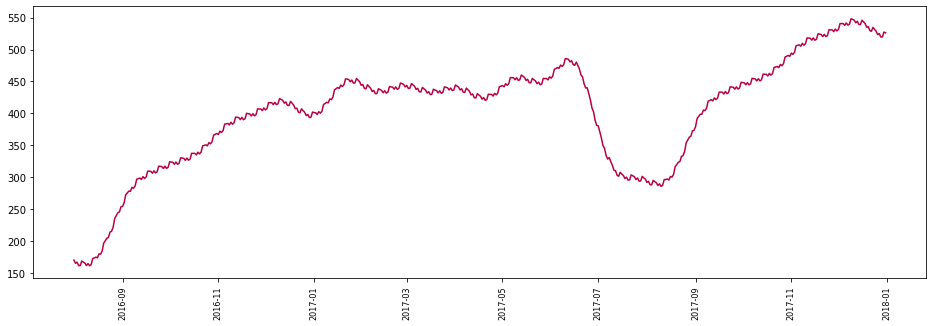

In [16]:
df17= df3[2249-212:]
# grouping month_year by sales
df17_temp = df17.groupby('ds').sum()['yhat'].reset_index()
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df17_temp['ds'], df17_temp['yhat'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

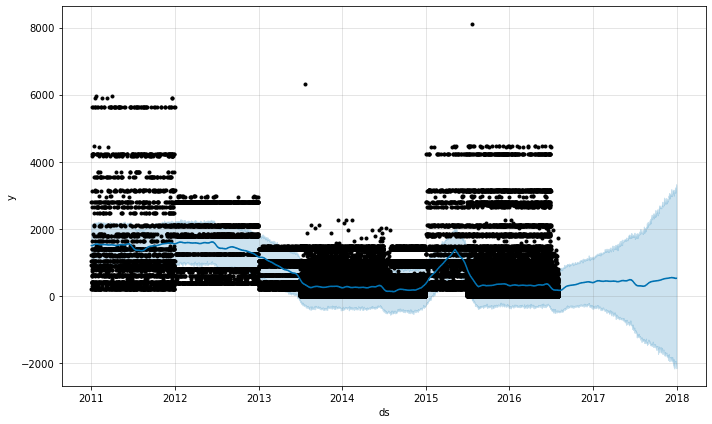

In [17]:
fig1 = m.plot(forecast)

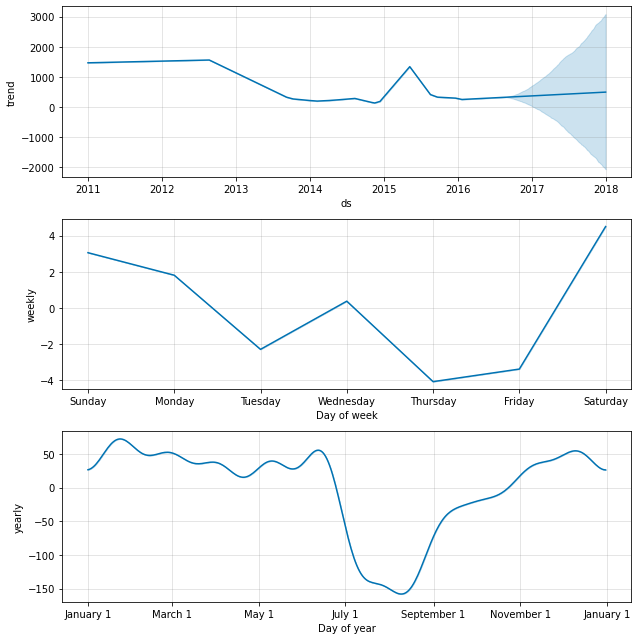

In [18]:
fig2 = m.plot_components(forecast)